# Figures with Dynamics

This notebook is intended to provide figures relating to the *dynamics* of the models we are discussing. Figures related to *inference* are handled in separate notebooks for each data set. 

In [1]:
import numpy as np
from numba import jit

from py.model import *
from py.scores import *
from py.utils import *

# from SpringRank import SpringRank

from matplotlib import pyplot as plt

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial Unicode MS"
matplotlib.rcParams['mathtext.fontset'] = "dejavusans"

# Setup: 

In [2]:
cset = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377']
cset_muted = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE', '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD','#000000']

In [3]:
@jit(nopython=True)
def linear_feature(s):
    return(np.outer(np.ones(len(s)), s))



/Users/philchodrow/Dropbox (MIT)/projects/!side_projects/prestige_reinforcement/py/scores.py:13: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, C))
  return(np.linalg.inv(L).dot(Do - Di).dot(np.ones(A.shape[0])))


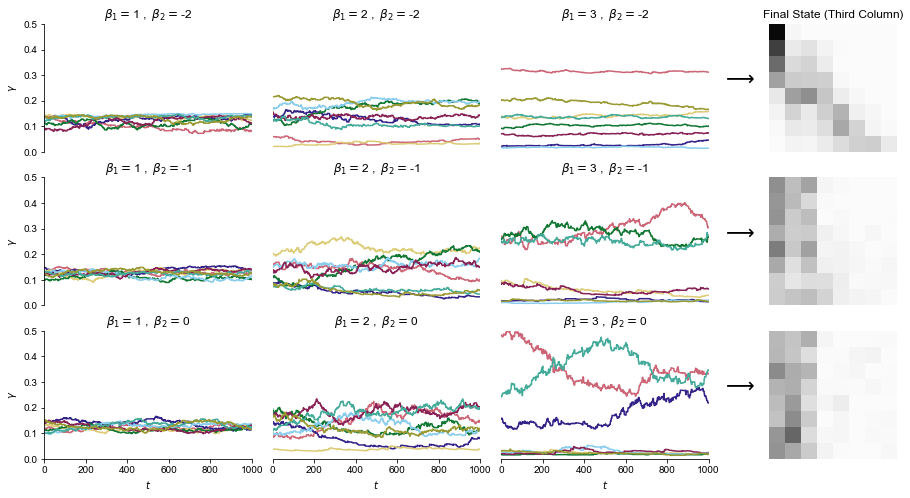

In [4]:
np.random.seed(seed=6)

BETA_1 = np.array([1,2,3])
BETA_2 = np.array([-2, -1, 0])

highlight_col = 2

def quadratic_feature(s):
    S = linear_feature(s)
    V = (S - S.T)**2
    return(V)

lam = .995
n_rounds = 2000
m_updates = 1

n = 8
A0 = np.random.rand(n,n)
A0 = A0/A0.sum()

ymax = 0.5
ymin = 0.0

fig, axarr = plt.subplots(3,4, figsize = (16, 8))

for i in range(3):
    for j in range(3):
        ax = axarr[j,i]
        beta_1 = BETA_1[i]
        beta_2 = BETA_2[j]

        M = model()
        M.set_score(score_function = lambda A: homebrew_SpringRank_score(A.T))
        M.set_features([linear_feature, 
                        quadratic_feature])

        M.simulate(beta = np.array([beta_1, beta_2]), 
                   lam = lam, 
                   A0 = A0, 
                   n_rounds = n_rounds, 
                   update = stochastic_update, 
                   m_updates = m_updates)
        GAMMA = M.get_rates()
        
        for k in range(n):
            p = ax.plot(GAMMA.mean(axis = 1)[np.int(n_rounds/2):,k], color = cset_muted[k])
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        ax.set(ylim = (ymin, ymax))
        ax.set(xlim = (0, np.int(n_rounds/2)))
        
        if j < 2:
            ax.spines['bottom'].set_visible(False)
            ax.xaxis.set_ticks([])
            plt.xticks([])

        if i > 0: 
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks([])
            plt.yticks([])

        if j == 2:
            ax.set(xlabel = r'$t$')
        if i == 0:
            ax.set(ylabel = r'$\gamma$')
        
        ax.set_title(
            r'$\beta_1 = $' + str(round(beta_1,2)) + r'$\;$,$\;$ $\beta_2 = $' + str(round(beta_2,2))
        )
        
        if i == highlight_col:
            ax = axarr[j,3]
            A = M.get_states()[-1]

            v = GAMMA[-1].mean(axis = 0) 
            ax.imshow(np.ones_like(A), cmap = 'Greys', vmax = 1, vmin = 0, alpha = 1)
            ax.imshow(matrix_sort(A, -v), vmax = .1,  cmap = 'Greys', alpha = .99)
#             axarr[j,3].axis('off')
            ax.set_ylabel(r'$\longrightarrow$', rotation=0, fontsize=20, labelpad=30, color = 'black')
            for pos in ['bottom', 'top', 'left', 'right']:
                ax.spines[pos].set_visible(False)
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])

axarr[0,3].set_title('Final State (Third Column)')

plt.subplots_adjust(wspace = 0.1)

plt.savefig('fig/dynamics_examples.png', bbox_inches = 'tight', dpi = 300)

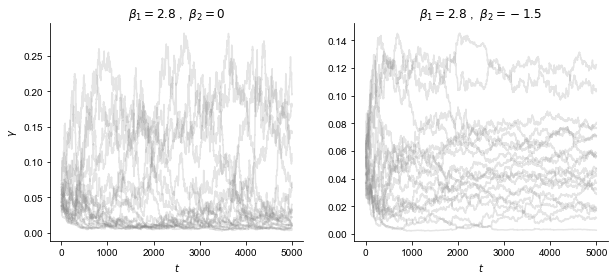

In [33]:
def quadratic_feature(s):
    S = linear_feature(s)
    V = (S - S.T)**2
    return(V)

lam = .995
n_rounds = 5000
m_updates = 1

n = 20
A0 = np.random.rand(n,n)
A0 = A0/A0.sum()

fig, axarr = plt.subplots(1,2, figsize = (10, 4), sharey = False)

M = model()
M.set_score(score_function = lambda A: homebrew_SpringRank_score(A.T))
M.set_features([linear_feature, 
                quadratic_feature])

M.simulate(beta = np.array([2.8, 0]), 
           lam = lam, 
           A0 = A0, 
           n_rounds = n_rounds, 
           update = stochastic_update, 
           m_updates = m_updates)
GAMMA = M.get_rates()

for j in range(n):
    p = axarr[0].plot(GAMMA.mean(axis = 1)[:,j], color = 'grey', alpha = .2)

M.simulate(beta = np.array([3, -2]), 
           lam = lam, 
           A0 = A0, 
           n_rounds = n_rounds, 
           update = stochastic_update, 
           m_updates = m_updates)
GAMMA = M.get_rates()
for j in range(n):
    p = axarr[1].plot(GAMMA.mean(axis = 1)[:,j], color = 'grey', alpha = .2)

for ax in axarr:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set(xlabel = r'$t$')
    
axarr[0].set(ylabel = r'$\gamma$')
axarr[0].set_title(r'$\beta_1 = 2.8\;$, $\;\beta_2 = 0$')
axarr[1].set_title(r'$\beta_1 = 2.8\;$, $\;\beta_2 = -1.5$')

plt.savefig('fig/SR_linear_and_quadratic.png', bbox_inches = 'tight', dpi = 300)

/Users/MariKawakatsu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:120: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


0
2
4


/Users/MariKawakatsu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:204: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


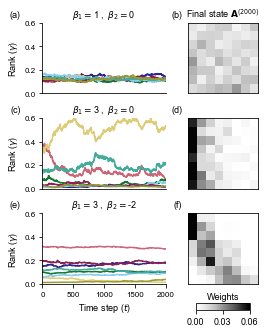

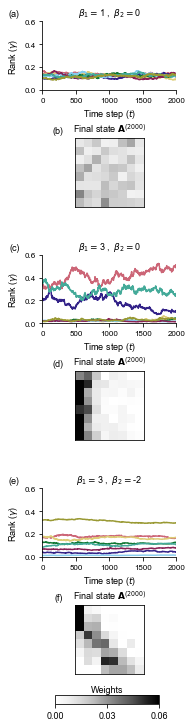

In [60]:
# MK's addition, we can delete this later if needed!
np.random.seed(seed=6)

# v2
# BETA_1 = np.array([1,2,3])
# BETA_2 = np.array([0])

# v3
# BETA_1 = np.array([1,1,3,3])
# BETA_2 = np.array([0,-2,0,-2])

# v4
BETA_1 = np.array([1,3,3])
BETA_2 = np.array([0,0,-2])

highlight_col = 0

def quadratic_feature(s):
    S = linear_feature(s)
    V = (S - S.T)**2
    return(V)

lam = .995
n_rounds = 4000
m_updates = 1

n = 8
A0 = np.random.rand(n,n)
A0 = A0/A0.sum()

ymax = 0.6
ymin = 0

fontsize = 9

#####################
# Main text version #
#####################
fig, axarr = plt.subplots(len(BETA_1),2, # len(BETA_2)*2, 
                          gridspec_kw={'width_ratios': [0.4, 1]},
                          figsize = (6, 1.6*len(BETA_1)))

for i in range(len(BETA_1)):
#     for j in range(len(BETA_2)): #v2
    for j in range(1): #v3/4

        row_num = i
        col_num = j
        
        ax = axarr[row_num,col_num]
        beta_1 = BETA_1[row_num]
#         beta_2 = BETA_2[col_num] #v2
        beta_2 = BETA_2[row_num] #v3/4

        M = model()
        M.set_score(score_function = lambda A: homebrew_SpringRank_score(A.T))
        M.set_features([linear_feature, 
                        quadratic_feature])

        M.simulate(beta      = np.array([beta_1, beta_2]), 
                   lam       = lam, 
                   A0        = A0, 
                   n_rounds  = n_rounds, 
                   update    = stochastic_update, 
                   m_updates = m_updates)
        GAMMA = M.get_rates()
        
        for k in range(n):
            p = ax.plot(GAMMA.mean(axis = 1)[np.int(n_rounds/2):,k], color = cset_muted[k])
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        ax.set(ylim = (ymin, ymax))
        ax.set(xlim = (0, np.int(n_rounds/2)))
        ax.tick_params(labelsize=fontsize-1)

        
        if row_num < len(BETA_1)-1:
#             ax.spines['bottom'].set_visible(False)
            ax.xaxis.set_ticks([])
            plt.xticks([])

        if col_num > 0:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks([])
            plt.yticks([])

        if row_num == len(BETA_1)-1:
            ax.set_xlabel(xlabel = r'Time step ($t$)', fontsize=fontsize)
        if col_num == 0:
            ax.set_ylabel(ylabel = r'Rank ($\gamma$)', fontsize=fontsize)
        
        ax.set_title(
            r'$\beta_1 = $' + str(round(beta_1,2)) + r'$\;$,$\;$ $\beta_2 = $' + str(round(beta_2,2)), #v3/4
#             r'$\beta_1 = $' + str(round(beta_1,2)), #v2
            fontsize=fontsize
        )
        
        if col_num == highlight_col:
            ax2 = axarr[row_num,highlight_col+1]
            A = M.get_states()[-1]

            v = GAMMA[-1].mean(axis = 0) 
#             ax.imshow(np.ones_like(A), cmap = 'Greys', vmax = 1, vmin = 0, alpha = 1)
            im = ax2.imshow(matrix_sort(A, -v), vmin = 0., vmax = .06,  cmap = 'Greys', alpha = .99)
#             axarr[j,3].axis('off')
#             ax.set_ylabel(r'$\longrightarrow$', rotation=0, fontsize=20, labelpad=30, color = 'black')
            for pos in ['bottom', 'top', 'left', 'right']:
                ax2.spines[pos].set_visible(True)
            ax2.xaxis.set_ticks([])
            ax2.yaxis.set_ticks([])

# axarr[0,len(BETA_2)].set_title('Final State')
axarr[0,1].set_title(r'Final state $\mathbf{A}^{(2000)}$', fontsize=fontsize)

# add colorbar
cbar_ax = fig.add_axes([0.48, 0.05, 0.125, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_clim(0.0,0.06)
cbar.set_ticks([0.00,0.03,0.06])
cbar.ax.tick_params(labelsize=fontsize)
cbar.ax.set_title('Weights',fontsize=fontsize,y=0.65)
cbar_ax.xaxis.set_ticks_position('bottom')

# add panel labels
for i, label in enumerate(('(a)','(b)','(c)','(d)','(e)','(f)')):
    ax = axarr[i//2,i%2]
    hloc = -0.175 + 0.1*(i%2)
    vloc = 1.185
    ax.text(hloc, vloc, label, transform=ax.transAxes,
      fontsize=fontsize, weight='bold', va='top', ha='right')

# adjust spacing
plt.subplots_adjust(wspace = -0.45, hspace = 0.35)

plt.savefig('dynamics_examples_v4.png', bbox_inches = 'tight', dpi = 600)

#####################
# Preprint version #
#####################
fig, axarr = plt.subplots(len(BETA_1)*2,1, # len(BETA_2)*2, 
                          gridspec_kw={'height_ratios': [1,1,1,1,1,1]},
                          figsize = (6/2/1.25, 1.6*len(BETA_1)*2.5))

for i in range(len(BETA_1)):
#     for j in range(1): #v3/4

        row_num = 2*(i)
        print(row_num)
        
        ax = axarr[row_num]
        beta_1 = BETA_1[i]
        beta_2 = BETA_2[i] #v3/4

        M = model()
        M.set_score(score_function = lambda A: homebrew_SpringRank_score(A.T))
        M.set_features([linear_feature, 
                        quadratic_feature])

        M.simulate(beta      = np.array([beta_1, beta_2]), 
                   lam       = lam, 
                   A0        = A0, 
                   n_rounds  = n_rounds, 
                   update    = stochastic_update, 
                   m_updates = m_updates)
        GAMMA = M.get_rates()
        
        for k in range(n):
            p = ax.plot(GAMMA.mean(axis = 1)[np.int(n_rounds/2):,k], color = cset_muted[k])
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        ax.set(ylim = (ymin, ymax))
        ax.set(xlim = (0, np.int(n_rounds/2)))
        ax.tick_params(labelsize=fontsize-1)

        ax.set_xlabel(xlabel = r'Time step ($t$)', fontsize=fontsize)
        ax.set_ylabel(ylabel = r'Rank ($\gamma$)', fontsize=fontsize)
        
        ax.set_title(
            r'$\beta_1 = $' + str(round(beta_1,2)) + r'$\;$,$\;$ $\beta_2 = $' + str(round(beta_2,2)), #v3/4
#             r'$\beta_1 = $' + str(round(beta_1,2)), #v2
            fontsize=fontsize
        )
      
        if col_num == highlight_col:
            ax2 = axarr[row_num+1]
            A = M.get_states()[-1]

            v = GAMMA[-1].mean(axis = 0) 
#             ax.imshow(np.ones_like(A), cmap = 'Greys', vmax = 1, vmin = 0, alpha = 1)
            im = ax2.imshow(matrix_sort(A, -v), vmin = 0., vmax = .06,  cmap = 'Greys', alpha = .99)
            for pos in ['bottom', 'top', 'left', 'right']:
                ax2.spines[pos].set_visible(True)
            ax2.xaxis.set_ticks([])
            ax2.yaxis.set_ticks([])
            ax2.set_title(r'Final state $\mathbf{A}^{(2000)}$', fontsize=fontsize)

# add colorbar
cbar_ax = fig.add_axes([0.2, 0.09, 0.6, 0.01])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_clim(0.0,0.06)
cbar.set_ticks([0.00,0.03,0.06])
cbar.ax.tick_params(labelsize=fontsize)
cbar.ax.set_title('Weights',fontsize=fontsize,y=0.7)
cbar_ax.xaxis.set_ticks_position('bottom')

# add panel labels
for i, label in enumerate(('(a)','(b)','(c)','(d)','(e)','(f)')):
    ax = axarr[i]
    hloc = -0.17
    vloc = 1.175
    ax.text(hloc, vloc, label, transform=ax.transAxes,
      fontsize=fontsize, weight='bold', va='top', ha='right')

# adjust spacing
plt.subplots_adjust(wspace = -0.45, hspace = 0.7)

plt.savefig('dynamics_examples_v4_preprint.png', bbox_inches = 'tight', dpi = 600)

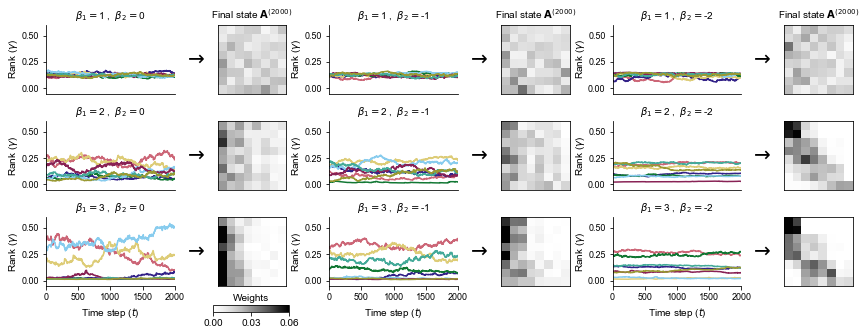

In [9]:
# MK's addition, we can delete this later if needed!
np.random.seed(seed=6)

# v3/5
BETA_1 = np.array([1,2,3])
BETA_2 = np.array([0,-1,-2])

highlight_col = 0

def quadratic_feature(s):
    S = linear_feature(s)
    V = (S - S.T)**2
    return(V)

lam = .995
n_rounds = 4000
m_updates = 1

n = 8
A0 = np.random.rand(n,n)
A0 = A0/A0.sum()

ymax = 0.6
ymin = -0.05

fontsize = 10

fig, axarr = plt.subplots(len(BETA_1), len(BETA_2)*2, 
#                           gridspec_kw={'width_ratios': [1, 1, 1, 1]},
                          figsize = (5*len(BETA_2), 1.6*len(BETA_1)))

for i in 2*np.arange(len(BETA_1)):
    for j in 2*np.arange(len(BETA_2)): #v2
#     for j in range(1): #v3/4

        row_num = i // 2
        col_num = j 
        
        ax = axarr[row_num,col_num]
        beta_1 = BETA_1[row_num]
        beta_2 = BETA_2[col_num // 2] #v2
#         beta_2 = BETA_2[row_num] #v3/4

        M = model()
        M.set_score(score_function = lambda A: homebrew_SpringRank_score(A.T))
        M.set_features([linear_feature, 
                        quadratic_feature])

        M.simulate(beta      = np.array([beta_1, beta_2]), 
                   lam       = lam, 
                   A0        = A0, 
                   n_rounds  = n_rounds, 
                   update    = stochastic_update, 
                   m_updates = m_updates)
        GAMMA = M.get_rates()
        
        for k in range(n):
            p = ax.plot(GAMMA.mean(axis = 1)[np.int(n_rounds/2):,k], color = cset_muted[k])
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        ax.set(ylim = (ymin, ymax))
        ax.set(xlim = (0, np.int(n_rounds/2)))
        ax.tick_params(labelsize=fontsize-1)

        
        if row_num < len(BETA_1)-1:
#             ax.spines['bottom'].set_visible(False)
            ax.xaxis.set_ticks([])
            plt.xticks([])

        if row_num == len(BETA_1)-1:
            ax.set(xlabel = r'Time step ($t$)')
        if col_num % 2 == 0:
            ax.set(ylabel = r'Rank ($\gamma$)')
        
        ax.set_title(
            r'$\beta_1 = $' + str(round(beta_1,2)) + r'$\;$,$\;$ $\beta_2 = $' + str(round(beta_2,2)), #v3/4
#             r'$\beta_1 = $' + str(round(beta_1,2)), #v2
            fontsize=fontsize
        )
        ax.yaxis.set_label_coords(-0.2,0.5)
        
#         ax3 = axarr[row_num,col_num+1]
        
#         ax3.spines['left'].set_visible(False)
#         ax.yaxis.set_ticks([])
#         plt.yticks([])

        
#         if col_num == highlight_col or col_num == highlight_col+2:
        ax2 = axarr[row_num,col_num+1]
        A = M.get_states()[-1]

        v = GAMMA[-1].mean(axis = 0) 
    #             ax.imshow(np.ones_like(A), cmap = 'Greys', vmax = 1, vmin = 0, alpha = 1)
        im = ax2.imshow(matrix_sort(A, -v), vmin = 0., vmax = .06,  cmap = 'Greys', alpha = .99)
    #         axarr[row_num,col_num+1].axis('off')
        ax2.set_ylabel(r'$\rightarrow$ ', rotation=0, fontsize=20, labelpad=0, color = 'black')
        ax2.yaxis.set_label_coords(-0.3,0.36)
        for pos in ['bottom', 'top', 'left', 'right']:
            ax2.spines[pos].set_visible(True)
        ax2.xaxis.set_ticks([])
        ax2.yaxis.set_ticks([])

        # axarr[0,len(BETA_2)].set_title('Final State')
        axarr[0,col_num+1].set_title(r'Final state $\mathbf{A}^{(2000)}$', fontsize=fontsize)

# add colorbar
cbar_ax = fig.add_axes([0.28, 0.05, 0.07, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
# cbar.set_clim(0.0,0.06)
cbar.set_ticks([.00,.03,0.06])
cbar.ax.tick_params(labelsize=fontsize)
cbar.ax.set_title('Weights',fontsize=fontsize,y=0.65)
cbar_ax.xaxis.set_ticks_position('bottom')

plt.subplots_adjust(hspace = 0.4, wspace = 0.1)

# plt.savefig('dynamics_examples_v5.png', bbox_inches = 'tight', dpi = 600)
plt.savefig('dynamics_examples_SI_v2.png', bbox_inches = 'tight', dpi = 600)

In [51]:
A.max()

0.12009056194794697